# - We have telecome churn data ,we will explore it and analyze.

**In this project we will be analyzing the data and exploring and building different features to see if we can come up with right information to help us predict  whether customer will churn or not and what are the  traits customer show before churning .**

we will begin by importing liberaries

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
# Getting data through csv file

df=pd.read_csv("telecome.csv")

In [3]:
df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


**Looking at shape of data**

In [5]:
df.shape

(3333, 21)

We have 21 features and 3333 instances

**We can look for structure of data and what type of  features we have by looking into info()**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

We have 5 catagorical (object + bool ) features and all other are quantitaive features

-- --

# - Data Exploration (EDA) + Feature engineering + Data Cleaning

Changing data type of "churn" column to int

In [26]:
df['churn']=df['churn'].astype("int")

In [87]:
# Basic Summery

df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [88]:
# Basic Summery of (Object , Bool) features

df.describe(include=["object","bool"])

,state,phone number,international plan,voice mail plan,churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,382-4657,no,no,False
freq,106,1,3010,2411,2850


In [89]:
# Churn and non-churn

df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [90]:
# Getting percentage

df['churn'].value_counts(normalize=True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

In [91]:
# Sorting by

df.sort_values(by="total day charge",ascending=False)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,94,18.40,253.9,100,11.43,10.1,9,2.73,1,True
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True
2594,OH,115,510,348-1163,yes,no,0,345.3,81,58.70,...,106,17.29,217.5,107,9.79,11.8,8,3.19,1,True
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,109,18.06,265.0,132,11.93,12.7,8,3.43,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,...,83,11.59,156.6,89,7.05,12.1,1,3.27,0,False
2753,OH,134,415,406-4158,no,no,0,7.8,86,1.33,...,100,14.57,186.5,80,8.39,12.9,2,3.48,2,False
2736,OK,127,510,403-1128,no,yes,27,2.6,113,0.44,...,102,21.59,242.7,156,10.92,9.2,5,2.48,3,False
1397,VT,101,510,413-7655,no,no,0,0.0,0,0.00,...,119,16.33,168.8,95,7.60,7.2,4,1.94,1,False


**Droping phone number column**

In [24]:
df.drop(columns=["phone number"],inplace=True)

In [15]:
df.sort_values(by=["churn","total day charge"],ascending=[True,False])

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
688,MN,13,510,338-7120,no,yes,21,315.6,105,53.65,...,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,363-7802,no,yes,31,313.8,87,53.35,...,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,373-6784,no,no,0,310.4,97,52.77,...,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,351-7369,no,yes,36,309.9,90,52.68,...,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,388-8583,no,yes,28,308.0,123,52.36,...,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,NH,117,510,397-1766,yes,no,0,54.2,100,9.21,...,84,25.77,171.8,84,7.73,8.6,2,2.32,1,1
2173,KS,47,510,418-5300,yes,no,0,47.8,120,8.13,...,123,15.21,152.6,96,6.87,13.3,7,3.59,0,1
2158,FL,166,510,367-1681,yes,no,0,47.7,89,8.11,...,95,22.47,235.2,97,10.58,13.2,3,3.56,0,1
1531,DE,138,510,380-7816,yes,no,0,46.5,104,7.91,...,114,15.81,167.5,95,7.54,9.6,4,2.59,4,1


# - churn analysis

**Churn is 14.5 % which is really high and it can bankrupt company**

In [16]:
df['churn'].mean()

0.14491449144914492

In [28]:
df['churn'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3333 entries, 0 to 3332
Series name: churn
Non-Null Count  Dtype
--------------  -----
3333 non-null   int64
dtypes: int64(1)
memory usage: 26.2 KB


**Creating another column to analyze mean of all numerical features**

In [29]:
df1=df.drop(columns=["state","international plan","voice mail plan"])

In [92]:
# Mean of quantitative features

df1[df1['churn'] == 1].mean()

account length            102.664596
area code                 437.817805
number vmail messages       5.115942
total day minutes         206.914079
total day calls           101.335404
total day charge           35.175921
total eve minutes         212.410145
total eve calls           100.561077
total eve charge           18.054969
total night minutes       205.231677
total night calls         100.399586
total night charge          9.235528
total intl minutes         10.700000
total intl calls            4.163561
total intl charge           2.889545
customer service calls      2.229814
churn                       1.000000
dtype: float64

# - Those who churn theri mean day minutes

In [31]:
df[df['churn']==1]['total day minutes'].mean()

206.91407867494823

In [93]:
# Getting rid of the spaces

df['international plan']=df['international plan'].str.strip()

**People who make international calls without international plan**

In [42]:
df[(df['churn']==0) &(df['international plan'] == "no")]['total intl minutes'].max()

18.9

In [49]:
df.loc[0:5,"state":"area code"]

,state,account length,area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [50]:
df.iloc[0:5,0:3]

,state,account length,area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


In [51]:
df[-1:]

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3332,TN,74,415,no,yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


**Max of everything**

In [52]:
df.apply(np.max)

state                        WY
account length              243
area code                   510
international plan          yes
voice mail plan             yes
number vmail messages        51
total day minutes         350.8
total day calls             165
total day charge          59.64
total eve minutes         363.7
total eve calls             170
total eve charge          30.91
total night minutes       395.0
total night calls           175
total night charge        17.77
total intl minutes         20.0
total intl calls             20
total intl charge           5.4
customer service calls        9
churn                         1
dtype: object

In [54]:
df[df['state'].apply(lambda state :state[0]=="W")].head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
9,WV,141,415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,no,yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,no,no,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,no,yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,no,no,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


**Changing international column to booian type**

In [55]:
d={"no":False,"yes":True}
df['international plan']=df['international plan'].replace(d)

In [56]:
df.head(4)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,False,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0


**Changing voice mail plan with boolian type**

In [57]:
df['voice mail plan']=df['voice mail plan'].replace(d)

In [58]:
df['voice mail plan']

0        True
1        True
2       False
3       False
4       False
        ...  
3328     True
3329    False
3330    False
3331    False
3332     True
Name: voice mail plan, Length: 3333, dtype: bool

#- Groupby by minutes and getting thire percentiles

In [59]:
cols=["total day minutes","total eve minutes","total night minutes"]

In [62]:
df.groupby(['churn'])[cols].describe(percentiles=[])

total day minutes                                            \
                  count        mean        std  min    50%    max   
churn                                                               
0                2850.0  175.175754  50.181655  0.0  177.2  315.6   
1                 483.0  206.914079  68.997792  0.0  217.6  350.8   

      total eve minutes                                             \
                  count        mean        std   min    50%    max   
churn                                                                
0                2850.0  199.043298  50.292175   0.0  199.6  361.8   
1                 483.0  212.410145  51.728910  70.9  211.3  363.7   

      total night minutes                                              
                    count        mean        std   min     50%    max  
churn                                                                  
0                  2850.0  200.133193  51.105032  23.2  200.25  395.0  
1                   483.0  205.231677  47.132825  47.4  204.80  354.9

**Interesting insight**

We can see those who churn have high day minutes mean ,std exept night minutes but 50% is high for all who churn .

In [63]:
# Only for Mean ,STD ,Min ,Max

df.groupby(['churn'])[cols].agg([np.mean,np.std,np.min,np.max])

total day minutes                        total eve minutes             \
                   mean        std  min    max              mean        std   
churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   total night minutes                          
        min    max                mean        std   min    max  
churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9

**Crosstab for churn and international plan**

In [65]:
pd.crosstab(df['churn'],df['international plan'])

international plan,False,True
churn,,
0,2664,186
1,346,137


**Crosstab for churn and voice mail**

In [68]:
pd.crosstab(df['churn'],df['voice mail plan'])

voice mail plan,False,True
churn,,
0,2008,842
1,403,80


In [70]:
df.pivot_table(['total day calls',"total eve minutes","total night calls"],['area code'],aggfunc="mean")

,total day calls,total eve minutes,total night calls
area code,,,
408,100.496420,201.284248,99.039379
415,100.576435,200.652085,100.398187
510,100.097619,201.323929,100.601190


**Interesting insight**

For different area codes there is no significant difference  

#- Some feature engineering

In [71]:
#Column for total calls

total_calls=(df['total day calls']+df['total eve calls']+df['total night calls']+df['total intl calls'])

In [72]:
# Inserting column for total calls

df.insert(loc=len(df.columns),column="total calls",value=total_calls)

In [73]:
# Inserting total_charge column into data_frame

df['total charge']=(df['total day charge']+df['total eve charge']+df['total night charge']+df['total intl charge'])

In [74]:
df.head(2)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total calls,total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.7,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.7,1,0,332,59.24


#- Simple predictive analysis

**Churn analyzed for international plan**

In [75]:
pd.crosstab(df['churn'],df['international plan'],margins=True)

international plan,False,True,All
churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


<Axes: xlabel='international plan', ylabel='count'>

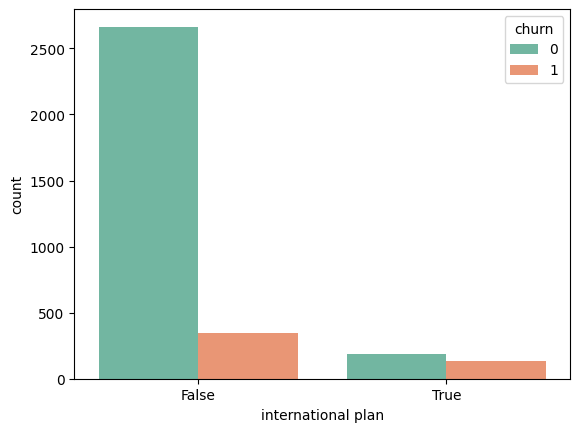

In [79]:
# Churn VS International plan

sns.countplot(x='international plan',hue='churn',data=df,palette="Set2")

#- Churn VS Customer service calls

In [80]:
pd.crosstab(df['churn'],df['customer service calls'],margins=True)

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


**Interesting Insight**

After 3 customer service calls Churn increases signifiantly .

Those who make 4 customer service calls have around 40% chance of churn.

Those with 5 calls have more than 50% chance of churn.

**Visuallizing insight**

<Axes: xlabel='customer service calls', ylabel='count'>

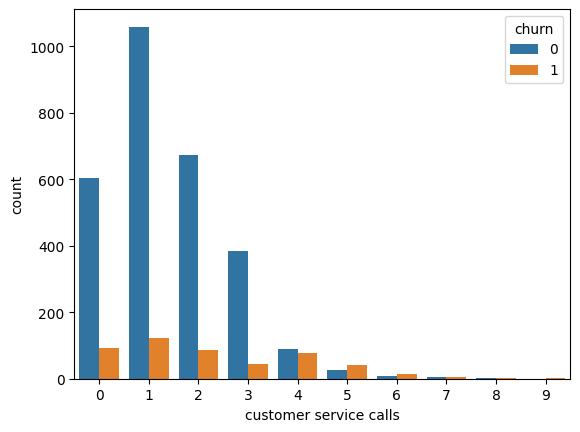

In [81]:
sns.countplot(x="customer service calls", hue="churn", data=df)

Its not that clear but can be seen at 5 service calls churn is higher

#-Those who make more than 3 customer service calls included into many service calls

In [82]:
df['many_service_calls']=(df['customer service calls'] > 3).astype("int")

In [83]:
# Analysis of those who make many customer service calls

pd.crosstab(df['many_service_calls'],df['churn'],margins=True)

churn,0,1,All
many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


<Axes: xlabel='many_service_calls', ylabel='count'>

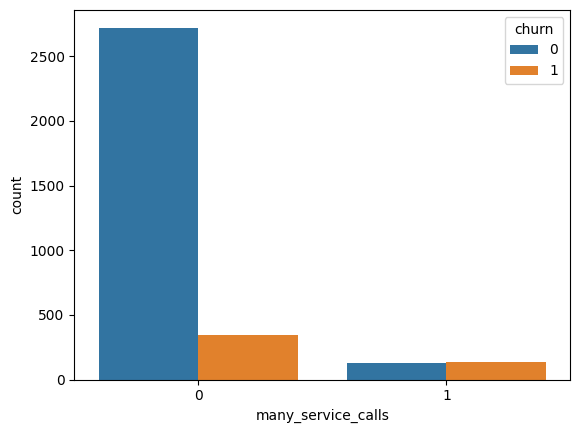

In [84]:
sns.countplot(x='many_service_calls',hue='churn',data=df)

**It is clear from visualization that who make many service calls has more than 50% chance of churn**

#- Analyzing many service calls and international plan (people with international plan has close to 50% chance of churn) againts churn.

In [85]:
pd.crosstab(df['many_service_calls'] & df['international plan'],df['churn'])

churn,0,1
row_0,,
False,2841,464
True,9,19


**Interesting insights**

Base line prediction.

Predicting that a customer is not loyal (Churn=1) in the case when the number of calls to the service center is greater than 3 and the International Plan is added (and predicting Churn=0 otherwise), we might expect an accuracy of 85.8% (we are mistaken only 464 + 9 times). This number, 85.8%, that we got through this very simple reasoning serves as a good starting point (baseline) for the further machine learning models that we can build.